In [ ]:
#Import Libraries
!pip install opencv-python
# py -m pip install opencv-python


In [ ]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [ ]:
import csv
df = pd.read_csv("train.csv")
base_path =(r'G:\LD\folder\images\images_000')

In [ ]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [ ]:
samples = 20000
df = df.loc[df['id'].str.startswith('00',na= False),:]
num_classes = len(df["landmark_id"].unique())
num_data= len(df)

In [ ]:
num_classes

5346

In [ ]:
num_data

6120

In [ ]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,31
1,83144,14
2,126637,7
3,194914,7
4,109169,6


In [ ]:
data.tail()

,landmark_id,count
5341,71434,1
5342,71336,1
5343,71228,1
5344,71145,1
5345,202981,1


In [ ]:
data['landmark_id'].describe()

count      5346.000000
mean     101742.002806
std       58868.187951
min          27.000000
25%       49712.500000
50%      101112.500000
75%      153584.750000
max      202981.000000
Name: landmark_id, dtype: float64

(array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([  0.  ,   9.44,  18.88,  28.32,  37.76,  47.2 ,  56.64,  66.08,
         75.52,  84.96,  94.4 , 103.84, 113.28, 122.72, 132.16, 141.6 ,
        151.04, 160.48, 169.92, 179.36, 188.8 , 198.24, 207.68, 217.12,
        226.56, 236.  , 245.44, 254.88, 264.32, 273.76, 283.2 , 292.64,
        302.08, 311.52, 320.96, 330.4 , 339.84, 349.28, 358.72, 368.16,
        377.6 , 387.04, 396.48, 405.92, 415.36, 424.8 , 434.24, 443.68,
        453.12, 462.56, 472.  , 481.44, 490.88, 500.32, 509.76, 519.2 ,
        528.64, 538.08, 547.52, 556.96, 566.4 

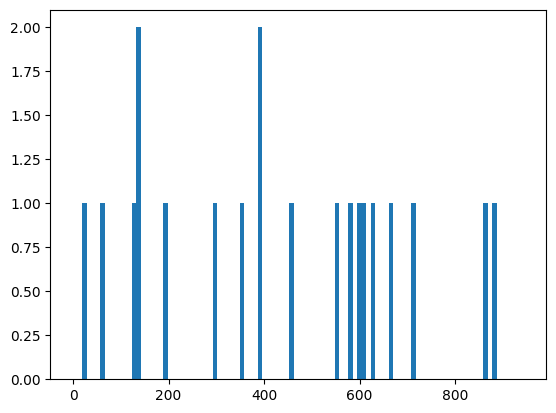

In [ ]:
plt.hist(data['landmark_id'],100,range = (0,944),label='test')

In [ ]:
data['count'].between(0,5).sum()

5339

In [ ]:
data['count'].between(5,10).sum()

14

(array([0., 2., 1., ..., 1., 1., 2.]),
 array([2.70000e+01, 2.70000e+01, 6.00000e+01, ..., 2.02950e+05,
        2.02972e+05, 2.02981e+05]),
 <BarContainer object of 6119 artists>)

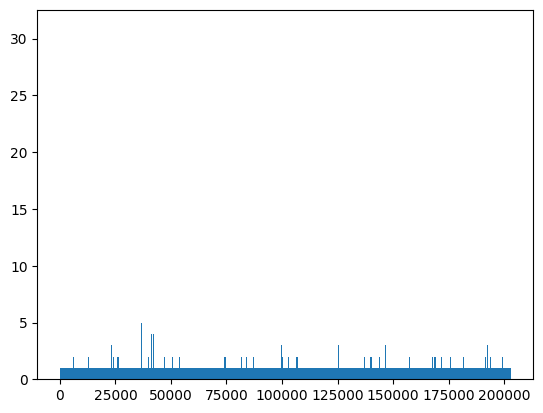

In [ ]:
plt.hist(df['landmark_id'],bins=df['landmark_id'])

In [ ]:
#Training the model
from sklearn.preprocessing import LabelEncoder
lencoder= LabelEncoder()
lencoder.fit(df['landmark_id'])

LabelEncoder()

In [ ]:
df.head()

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134


In [ ]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [ ]:
def decode_label(lbl):
    return lencoder.inverse.transform(lbl)

In [ ]:
def get_image_from_number(num,df):
    fname,label = df.iloc[num,:]
    fname = fname+'.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path = os.path.join(base_path,f1,f2,f3,fname)
    im= cv2.imread(full_path)
    return im, label

4 sample images from random classes


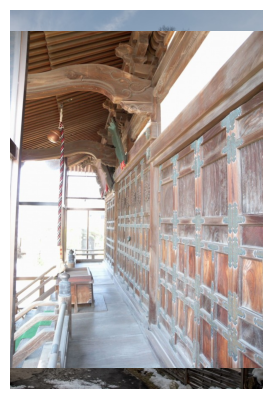

In [ ]:
print("4 sample images from random classes")
fig = plt.figure(figsize=(15,15))
for i in range(1,5):
    ri= random.choices(os.listdir(base_path),k=3)
    folder = base_path + '/'+ ri[0] +'/'+ri[1]+ '/'+ ri[2]
    random_img= random.choice(os.listdir(folder))
    img =np.array(Image.open(folder +'/'+ random_img))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
#Parameters
learning_ratio = 0.0001
decay_speed= 1e-6
momentum =0.09
loss_function= "sparse_categorical_crossentrophy"
source_model= VGG19(weights=None)
drop_layer = Dropout(0.5)

In [ ]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes,activation="softmax"))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, 224, 224, 3)       12        
 chNormalization)                                                
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                      

In [ ]:
optim1 = keras.optimizer_v1.RMSprop(lr= learing_rate)
model.compile(optimizer=optim1, loss= loss_function, metrics= ["accuracy"])

AttributeError: module 'keras' has no attribute 'optimizer_v1'

In [ ]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [ ]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img =start+batch_size
    if(end_img)> len(dataframe):
        end_img = len(dataframe)

    for idx in range(start,end_img):
        n = idx
        im,label = get_image_from_number(n,dataframe)
        im =image_reshape(im, (224,224)) /255.0
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)
    return np.array(image_array),np.array(label_array)

In [ ]:
#Split
train,val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

1264376
316094


In [ ]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1



In [ ]:
for e in range(epochs):
    print("Epoch : "+ str (0+1)+ "/"+ str(epochs))
    if epoch_shuffle:
        train= train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train)

model.save("Model")

Epoch : 1/1


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
#Test
batch_size = 16

errors =0
good_preds= []
bad_preds =[]

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val,y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(x_val)
    cla= np.argmax(result, axis=1)
    for idx,res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx],cla[idx],res[cla[idx]])
        else:
            good_preds.append([batch_size*it + idx],cla[idx],res[cla[idx]])

for i in range(1,6) :
    n = int(good_preds[0])
    img, lbl = get_imgage_from_number(n,val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
